In [3]:
import math
import torch
import hess
import matplotlib.pyplot as plt
from hess.nets import Transformer
from hess.data import data_loader
import numpy as np
import sklearn.datasets as datasets

In [4]:
def twospirals(n_points, noise=.2, random_state=88):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 600 * (2*np.pi)/360
    d1x = -1.5*np.cos(n)*n + np.random.randn(n_points,1) * noise
    d1y =  1.5*np.sin(n)*n + np.random.randn(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))),
            np.hstack((np.zeros(n_points),np.ones(n_points))))

In [5]:
X, Y = twospirals(500, noise=0.5)

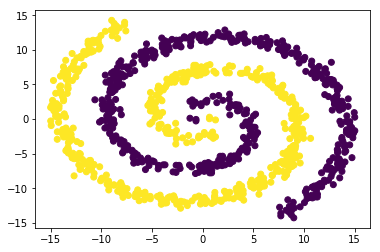

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [7]:
train_x = torch.FloatTensor(X)

In [8]:
train_y = torch.FloatTensor(Y).unsqueeze(-1)

In [9]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    torch.cuda.set_device(4)
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    train_x, train_y = train_x.cuda(), train_y.cuda()

In [10]:
optimus = Transformer(train_x, train_y, net=hess.nets.MoonNet, n_hidden=5, hidden_size=20,
                     activation=torch.nn.ELU(), bias=True)

In [11]:
print(sum(p.numel() for p in optimus.net.parameters()))

1761


In [12]:
if use_cuda:
    optimus = optimus.cuda()

In [13]:
out = optimus(train_x)

/home/greg_b/anaconda3/envs/home/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [14]:
print(out.shape)

torch.Size([1000, 1])


In [15]:
optimus.train_net(print_loss=True, lr=0.01, iters=5000,
                 loss_func=torch.nn.BCELoss())

tensor(0.6982, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6652, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6462, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6517, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6449, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6397, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6413, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6370, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6294, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6266, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6257, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6188, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6108, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6076, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5987, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5862, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5789, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5651, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5582, grad_fn=<BinaryCrossEntropyBack

tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0002, grad_fn=<BinaryCrossEntropyBack

tensor(3.8819e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.8569e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.8322e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.8078e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.7838e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.7599e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.7362e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.7129e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6898e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6668e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6440e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6216e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.5993e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.5773e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.5556e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.5340e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.5127e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.4914e-05, grad_fn=<Bin

tensor(1.7434e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7366e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7296e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7227e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7159e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7091e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7024e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.6956e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.6890e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.6824e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.6759e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.6693e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.6627e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.6562e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.6499e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.6434e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.6370e-05, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.6307e-05, grad_fn=<Bin

tensor(9.9630e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.9331e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.9039e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.8741e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.8438e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.8150e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.7862e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.7574e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.7289e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.7004e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.6721e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.6435e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.6158e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.5863e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.5590e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.5310e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.5031e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.4756e-06, grad_fn=<Bin

tensor(6.4938e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.4785e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.4631e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.4467e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.4320e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.4165e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.4011e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3856e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3704e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3550e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3405e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3247e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3102e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.2946e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.2798e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.2644e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.2500e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.2361e-06, grad_fn=<Bin

tensor(4.5449e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.5359e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.5267e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.5179e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.5084e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.4993e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.4895e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.4807e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.4716e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.4621e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.4526e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.4442e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.4351e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.4267e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.4177e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.4088e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.4002e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.3912e-06, grad_fn=<Bin

tensor(3.3420e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.3361e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.3298e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.3239e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.3178e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.3122e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.3068e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.3007e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2947e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2884e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2829e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2777e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2714e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2660e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2608e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2546e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2487e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2431e-06, grad_fn=<Bin

tensor(2.5533e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5488e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5449e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5412e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5368e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5329e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5291e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5248e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5207e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5178e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5135e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5099e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5057e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5021e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4983e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4946e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4904e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4860e-06, grad_fn=<Bin

tensor(2.0068e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.0043e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.0013e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9981e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9948e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9922e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9892e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9866e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9840e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9809e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9778e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9752e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9724e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9691e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9665e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9635e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9608e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9581e-06, grad_fn=<Bin

tensor(1.6043e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.6025e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.6002e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5977e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5961e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5944e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5921e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5900e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5878e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5856e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5833e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5807e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5789e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5769e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5751e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5727e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5704e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5682e-06, grad_fn=<Bin

tensor(1.2997e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2976e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2967e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2950e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2933e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2914e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2897e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2885e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2873e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2854e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2842e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2826e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2804e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2783e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2773e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2752e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2739e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2727e-06, grad_fn=<Bin

tensor(1.0708e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0696e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0684e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0672e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0661e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0646e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0634e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0621e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0608e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0596e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0583e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0572e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0560e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0543e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0532e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0522e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0512e-06, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0495e-06, grad_fn=<Bin

tensor(8.8813e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.8712e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.8604e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.8503e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.8414e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.8289e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.8205e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.8074e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.7979e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.7925e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.7794e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.7675e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.7597e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.7514e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.7418e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.7353e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.7257e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(8.7162e-07, grad_fn=<Bin

tensor(7.4996e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.4925e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.4829e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.4758e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.4710e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.4656e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.4573e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.4484e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.4442e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.4376e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.4275e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.4209e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.4120e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.4007e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.3947e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.3887e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.3834e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(7.3726e-07, grad_fn=<Bin

tensor(6.4064e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.4028e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3987e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3897e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3856e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3802e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3742e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3689e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3611e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3546e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3510e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3444e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3325e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3313e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3260e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3182e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3122e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(6.3057e-07, grad_fn=<Bin

tensor(5.5254e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.5183e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.5147e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.5076e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.5052e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.4998e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.4944e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.4903e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.4861e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.4795e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.4742e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.4694e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.4640e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.4581e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.4521e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.4479e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.4432e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(5.4396e-07, grad_fn=<Bin

tensor(4.7941e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7923e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7899e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7827e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7798e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7750e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7714e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7660e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7601e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7547e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7494e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7476e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7428e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7404e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7362e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7339e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7303e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.7219e-07, grad_fn=<Bin

tensor(4.1754e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1736e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1706e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1670e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1658e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1622e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1569e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1515e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1491e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1461e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1432e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1384e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1354e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1324e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1301e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1253e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1223e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(4.1175e-07, grad_fn=<Bin

tensor(3.6508e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6484e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6466e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6419e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6395e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6383e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6341e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6312e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6270e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6252e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6222e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6204e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6174e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6127e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6109e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6109e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6097e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.6073e-07, grad_fn=<Bin

tensor(3.2193e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2145e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2109e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2097e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2074e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2044e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2020e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.2008e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.1990e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.1972e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.1895e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.1877e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.1847e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.1829e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.1811e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.1776e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.1746e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(3.1740e-07, grad_fn=<Bin

tensor(2.8438e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8396e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8378e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8354e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8318e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8295e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8271e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8235e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8223e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8193e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8163e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8116e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8110e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8092e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8062e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.8050e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.7973e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.7943e-07, grad_fn=<Bin

tensor(2.5118e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5106e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5100e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5070e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5046e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5034e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.5022e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4998e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4980e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4963e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4927e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4909e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4903e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4879e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4861e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4831e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4814e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.4808e-07, grad_fn=<Bin

tensor(2.2346e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2322e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2286e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2274e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2268e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2262e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2239e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2221e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2209e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2191e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2185e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2173e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2173e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2143e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2119e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2113e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2096e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(2.2072e-07, grad_fn=<Bin

tensor(1.9884e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9854e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9842e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9825e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9795e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9795e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9795e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9789e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9783e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9777e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9765e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9747e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9693e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9688e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9676e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9670e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9652e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.9646e-07, grad_fn=<Bin

tensor(1.7655e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7649e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7637e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7613e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7601e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7583e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7572e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7572e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7560e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7554e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7530e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7518e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7506e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7476e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7470e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7470e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7452e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.7434e-07, grad_fn=<Bin

tensor(1.5748e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5742e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5742e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5724e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5712e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5688e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5676e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5664e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5658e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5634e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5634e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5634e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5634e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5628e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5616e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5599e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5593e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5581e-07, grad_fn=<Bin

tensor(1.4174e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4156e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4156e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4150e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4144e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4132e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4120e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4114e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4091e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4079e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4073e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4061e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4061e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4049e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4025e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.3983e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.3983e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.3983e-07, grad_fn=<Bin

tensor(1.2720e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2702e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2696e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2696e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2690e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2684e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2672e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2672e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2642e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2624e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2612e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2612e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2612e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2606e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2583e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2577e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2577e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.2559e-07, grad_fn=<Bin

tensor(1.1462e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1462e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1450e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1438e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1426e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1402e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1402e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1402e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1402e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1385e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1385e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1379e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1373e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1361e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1349e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1349e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1325e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1301e-07, grad_fn=<Bin

tensor(1.0330e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0318e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0318e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0318e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0294e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0282e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0270e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0270e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0270e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0246e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0228e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0222e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0222e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0222e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0222e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0216e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0198e-07, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.0198e-07, grad_fn=<Bin

tensor(9.2983e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2924e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2864e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2745e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2745e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2745e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2745e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2745e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2626e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2566e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2387e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2387e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2387e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2387e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2387e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2149e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2149e-08, grad_fn=<BinaryCrossEntropyBackward>)
tensor(9.2149e-08, grad_fn=<Bin

In [16]:
out = optimus(train_x)

In [17]:
out.shape

torch.Size([1000, 1])

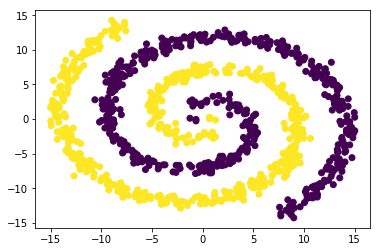

In [18]:
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=out[:, 0].detach().cpu())

## Let's get this bread

In [19]:
import hess.utils as utils

In [20]:
model = optimus.net
par_list = model.parameters()
n_par_w_bias = sum(torch.numel(p) for p in par_list)

In [21]:
n_par_w_bias

1761

In [22]:
e1 = torch.zeros(n_par_w_bias)
e1[0] = 1
e1 = e1.unsqueeze(0)

In [23]:
magic_e1 = utils.unflatten_like(e1, model.parameters())
if use_cuda:
    magic_e1 = [t.cuda() for t in magic_e1]

In [24]:
utils.eval_hess_vec_prod(magic_e1, model.parameters(), 
                         net=optimus.net,
                         criterion=torch.nn.MSELoss(), 
                         inputs=train_x, targets=train_y)

In [25]:
output = utils.gradtensor_to_tensor(optimus.net, include_bn=True)

In [26]:
output.nelement()

1761

In [27]:
base_vec = torch.zeros(n_par_w_bias).cpu().unsqueeze(0)
base_vec[0, 0] = 1.

base_vec = utils.unflatten_like(base_vec, model.parameters())
utils.eval_hess_vec_prod(base_vec, model.parameters(),
                        net=optimus.net.cpu(),
                        criterion=torch.nn.MSELoss(),
                        inputs=train_x.cpu(), targets=train_y.cpu())
output = utils.gradtensor_to_tensor(optimus.net.cpu(), include_bn=True)

n_par = output.nelement()

In [28]:
hessian = torch.zeros(n_par, n_par).cpu()
for pp in range(n_par):
    base_vec = torch.zeros(n_par_w_bias).cpu().unsqueeze(0)
    base_vec[0, pp] = 1.
    
    base_vec = utils.unflatten_like(base_vec, model.parameters())
    utils.eval_hess_vec_prod(base_vec, model.parameters(),
                            net=optimus.net.cpu(),
                            criterion=torch.nn.MSELoss(),
                            inputs=train_x.cpu(), targets=train_y.cpu())
    if pp == 0:
        output = utils.gradtensor_to_tensor(optimus.net, include_bn=True)
        hessian = torch.zeros(output.nelement(), output.nelement())
        hessian[:, pp] = output
    hessian[:, pp] = utils.gradtensor_to_tensor(optimus.net.cpu(), include_bn=True).cpu()

In [29]:
torch.cuda.empty_cache()

In [30]:
e_val, e_vec = np.linalg.eig(hessian.cpu())
idx = np.abs(e_val).argsort()[::-1]   
e_val = torch.FloatTensor(e_val[idx].real)
e_vec = torch.FloatTensor(e_vec[:,idx].real)

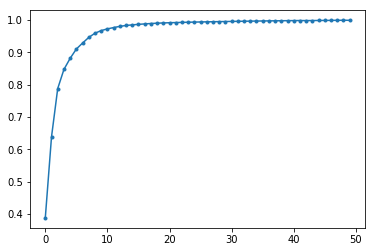

In [31]:
ne = e_val.div(torch.sum(e_val))
plt.plot(np.cumsum(ne[:50].cpu()), marker=".")

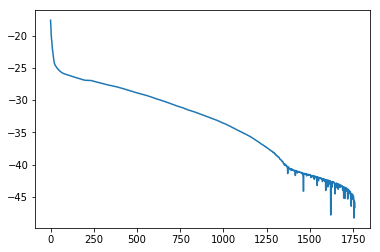

In [32]:
plt.plot(np.log(np.abs(e_val)))

## Save model to use on laptop

In [33]:
torch.save(optimus.net.state_dict(), "../hess/saved-models/spirals.pt")
saved_pars = optimus.net.state_dict()

In [34]:
torch.save(hessian, "../hess/saved-models/spirals_hessian.pt")

In [35]:
torch.set_default_tensor_type(torch.FloatTensor)
optimus = optimus.cpu();

## First Plot the Found Classifier

In [36]:
buffer = 0.5
h = 0.1
x_min, x_max = train_x[:, 0].min() - buffer, train_x[:, 0].max() + buffer
y_min, y_max = train_x[:, 1].min() - buffer, train_x[:, 1].max() + buffer

xx,yy=np.meshgrid(np.arange(x_min.cpu(), x_max.cpu(), h), 
                  np.arange(y_min.cpu(), y_max.cpu(), h))
in_grid = torch.FloatTensor([xx.ravel(), yy.ravel()]).t()

In [37]:
preds = optimus(in_grid).squeeze().cpu()

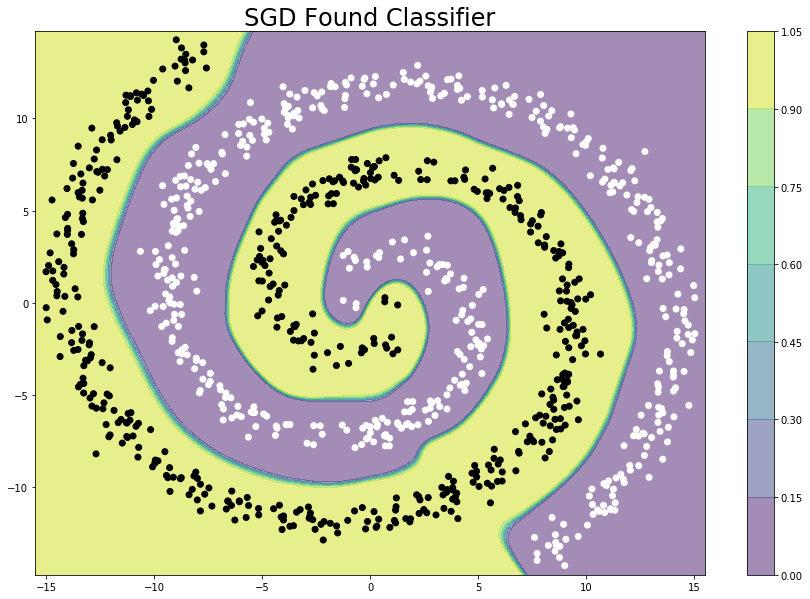

In [38]:
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, preds.detach().numpy().reshape(xx.shape), alpha=0.5)
plt.title("SGD Found Classifier", fontsize=24)
plt.colorbar()
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary)

## How Should We Sample Perturbations

In [39]:
n_val = e_val.nelement()
n_val = 10
basis = e_vec[:, -n_val:]

In [40]:
optimus.net.load_state_dict(saved_pars)

<All keys matched successfully>

In [41]:
sig = 0.01/e_val[-n_val:].abs().pow(0.5)
wghts = torch.normal(torch.zeros(n_val), sig)

In [42]:
perturb = basis.matmul(wghts.unsqueeze(-1)).t()

In [43]:
perturb = utils.unflatten_like(perturb, optimus.net.parameters())
for i, par in enumerate(optimus.net.parameters()):
    par.data = par.data + perturb[i]

In [44]:
buffer = 0.5
h = 0.1
x_min, x_max = train_x[:, 0].min() - buffer, train_x[:, 0].max() + buffer
y_min, y_max = train_x[:, 1].min() - buffer, train_x[:, 1].max() + buffer

xx,yy=np.meshgrid(np.arange(x_min.cpu(), x_max.cpu(), h), 
                  np.arange(y_min.cpu(), y_max.cpu(), h))
in_grid = torch.FloatTensor([xx.ravel(), yy.ravel()]).t()

In [45]:
preds = optimus(in_grid).squeeze().cpu()

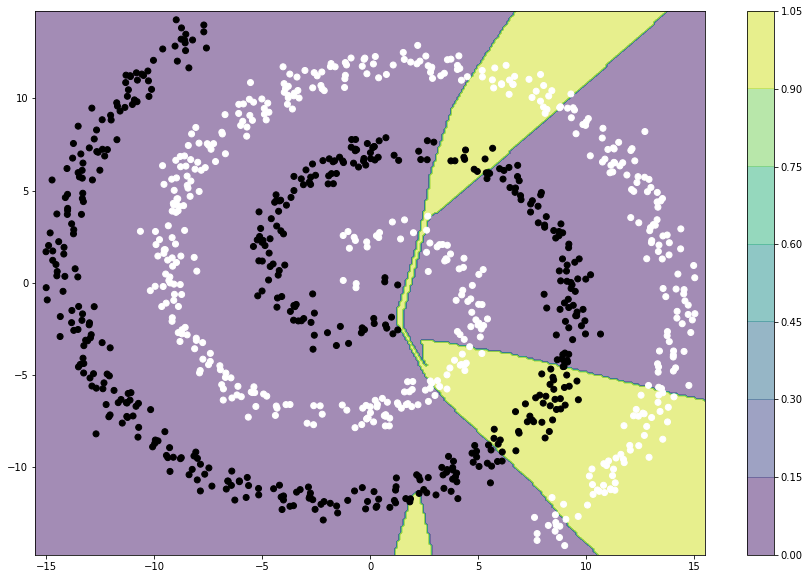

In [46]:
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, preds.detach().numpy().reshape(xx.shape), alpha=0.5)
# plt.title("Temp Scaled", fontsize=24)
plt.colorbar()
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary)

## Let's Try Averaging

In [47]:
buffer = 0.5
h = 0.1
x_min, x_max = train_x[:, 0].min() - buffer, train_x[:, 0].max() + buffer
y_min, y_max = train_x[:, 1].min() - buffer, train_x[:, 1].max() + buffer

xx,yy=np.meshgrid(np.arange(x_min.cpu(), x_max.cpu(), h), 
                  np.arange(y_min.cpu(), y_max.cpu(), h))
in_grid = torch.FloatTensor([xx.ravel(), yy.ravel()]).t()

In [48]:
n_val = e_val.nelement()
basis = e_vec[:, :n_val]
sig = 0.00001/e_val[:n_val].abs().pow(0.5)

n_trial = 10
pred = torch.zeros(in_grid.size(0), n_trial).cpu()
for tt in range(n_trial):
    optimus.net.load_state_dict(saved_pars)
    wghts = torch.normal(torch.zeros(n_val), sig)
    perturb = basis.matmul(wghts.unsqueeze(-1)).t()
#     perturb = perturb.div(perturb.norm()).mul(scale)

    perturb = utils.unflatten_like(perturb, optimus.net.parameters())
    for i, par in enumerate(optimus.net.parameters()):
        par.data = par.data + perturb[i]
        
    pred[:, tt] = optimus(in_grid).squeeze().cpu()

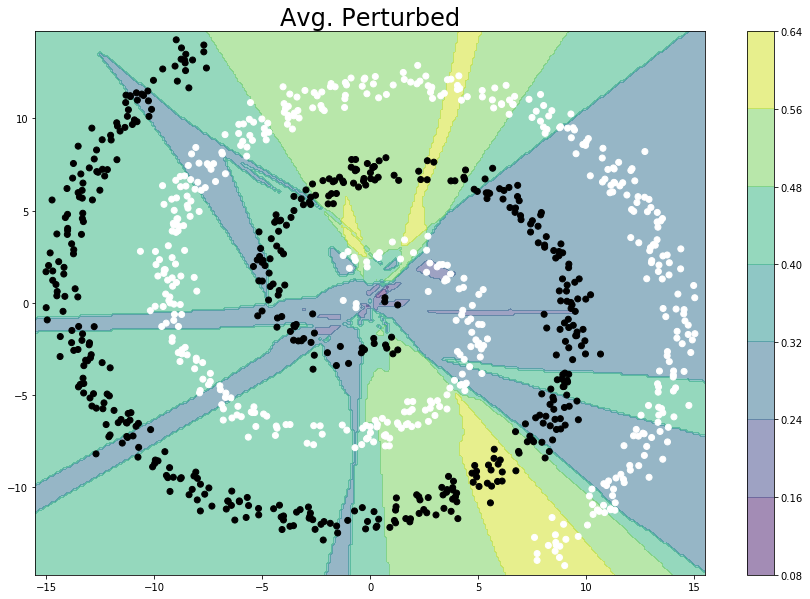

In [49]:
avg_pred = pred.mean(1).detach().numpy().reshape(xx.shape)
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, avg_pred, alpha=0.5)
plt.title("Avg. Perturbed", fontsize=24)
plt.colorbar()
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary)